In [3]:
import os
import pandas as pd

In [4]:
database = pd.read_excel(os.path.join('data', 'database.xlsx'))
database

,Date naissance,DATE inclusion,Sex F:0 H:1,Données pré-opératoires,Poids,Taille,IMC,Hypertension artérielle Non:0 Oui: 1,Diabète Non:0 Oui: 1,Dyslipidémie Non:0 Oui: 1,...,Ferritine.1,Actitest.1,Fibrotest.1,Insuline,Peptide C,Dépense énergétique de repos,Syndrome d'apnée du someil Non: 0 Oui: 1 à 3.1,Apparéillée.1,Elastométrie.1,CAP.1
0,1973-03-06,2015-02-04,1.0,NaN,143,183,42.700588,0.0,0,0,...,332.0,0.17,0.11,13.0,NaN,NaN,0.0,0.0,16.9,294.0
1,1966-11-18,2014-12-02,0.0,NaN,129,176,41.645145,0.0,0,1,...,147.0,0.40,0.19,14.0,NaN,1877.0,0.0,0.0,4.8,313.0
2,1964-11-21,2012-12-04,0.0,NaN,118,178,37.242772,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964-05-25,2017-04-07,0.0,NaN,131,157,53.146172,1.0,0,0,...,7.0,0.04,0.14,6.0,1.1,1452.0,NaN,1.0,7.7,308.0
4,1958-11-07,2013-01-07,0.0,NaN,121,156,49.720579,0.0,1,0,...,153.0,NaN,NaN,12.0,NaN,1605.0,4.0,1.0,3.5,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,1958-10-15,2018-09-14,0.0,NaN,106,165,38.934803,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,1969-03-23,2018-11-27,0.0,NaN,107,158,42.861721,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,1962-02-07,2018-09-24,0.0,NaN,149,164,55.398572,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,1992-04-10,2019-01-23,0.0,NaN,112,165,41.138659,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
corr = database.corr()
corr.style.background_gradient(cmap='coolwarm')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

Cleaning database

In [ ]:
database = database.filter(['Présence NASH         Non: 0 Oui: 1', 'Pourcentage stéatose', 'Inflammation lobulaire'], axis='columns')
database = database.rename({
    'Présence NASH         Non: 0 Oui: 1':'Forme grave',
    'Stéatose':'Pourcentage stéatose',
    'Inflammation lobulaire':'Inflammation lobulaire'
})
database = database.dropna()
database

,Présence NASH Non: 0 Oui: 1,Pourcentage stéatose,Inflammation lobulaire
0,1.0,90.0,2.0
1,1.0,90.0,1.0
2,1.0,80.0,1.0
4,0.0,30.0,1.0
6,0.0,30.0,1.0
...,...,...,...
782,0.0,0.0,1.0
783,1.0,90.0,2.0
784,1.0,80.0,1.0
785,0.0,30.0,1.0


In [ ]:
import numpy as np
database_arr = database.to_numpy()
labels = list(database.columns)
print(labels)
database_arr

['Présence NASH         Non: 0 Oui: 1', 'Pourcentage stéatose', 'Inflammation lobulaire']


array([[ 1., 90.,  2.],
       [ 1., 90.,  1.],
       [ 1., 80.,  1.],
       ...,
       [ 1., 80.,  1.],
       [ 0., 30.,  1.],
       [ 0., 15.,  1.]])

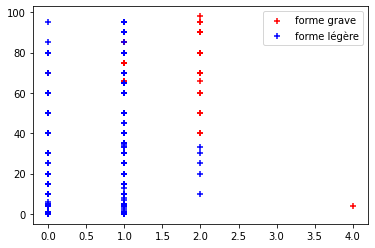

In [ ]:
import matplotlib.pyplot as plt

forme = database_arr[:, 0]
grave = forme == 1
steatose = database_arr[:, 1]
inflammation = database_arr[:, 2]
plt.scatter(inflammation[grave], steatose[grave], marker='+', color='r', label='forme grave')
plt.scatter(inflammation[~grave], steatose[~grave], marker='+', color='b', label='forme légère')
plt.legend()